In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [16]:
print("="*60)
print("DATA RETRIEVAL AND EXPLORATION")
print("="*60)

DATA RETRIEVAL AND EXPLORATION


In [3]:
# Importing Dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# number of rows and columns
df.shape


(1470, 35)

In [9]:
print(f"Number of employees: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of employees: 1470
Number of features: 35


In [7]:
# basic info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no null values.

In [10]:
# statistical distribution of each numerical feature
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [48]:
# Target Variable Distribution:
print(df['Attrition'].value_counts())
print(f"Attrition Rate: {(df['Attrition'] == 'Yes').mean():.2%}")

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition Rate: 16.12%


In [12]:
# number of categorical and numerical features
df.dtypes.value_counts()

,count
int64,26
object,9


There are 26 numerical columns and 9 categorical columns.

In [13]:
# checking duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1465,False
1466,False
1467,False
1468,False


In [14]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


There are no duplicate rows.

In [15]:
print("\n" + "="*60)
print("FEATURE SIGNIFICANCE ANALYSIS")
print("="*60)


FEATURE SIGNIFICANCE ANALYSIS


In [17]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Features: {categorical_features}")


Categorical Features: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [18]:
# unique values in each categorical feature
print("\nUnique values in categorical columns:")
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
Over18: ['Y']
OverTime: ['Yes' 'No']


In [19]:
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)


DATA PREPROCESSING


In [20]:
# Creating a copy for processing dataframe in order to not change the original one
df_processed = df.copy()

In [21]:
# checking duplicates
print(f"Number of duplicate rows: {df_processed.duplicated().sum()}")

Number of duplicate rows: 0


In [22]:
# checking null values
print(f"Number of null values: {df.isnull().sum()}")

Number of null values: Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRol

We don't have null and duplicate values.

In [23]:
# checking constant columns (columns with constant/single unique value)
constant_cols = []
for col in df_processed.columns:
    if df_processed[col].nunique() == 1:
        constant_cols.append(col)

In [24]:
# removing constant columns
if constant_cols:
    print(f"Constant columns to remove: {constant_cols}")
    df_processed = df_processed.drop(columns=constant_cols)
else:
    print("No constant columns found.")

Constant columns to remove: ['EmployeeCount', 'Over18', 'StandardHours']


In [25]:
df_processed.shape

(1470, 32)

In [29]:
numerical_features = df_processed.select_dtypes(include=['int64', 'float64'])
numerical_features.shape

(1470, 24)

In [30]:
# checking outliers
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = {}

print("\nOutlier Analysis:")
for col in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(df_processed, col)
    outlier_summary[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers (bounds: {lower:.2f} - {upper:.2f})")


Outlier Analysis:
Age: 0 outliers (bounds: 10.50 - 62.50)
DailyRate: 0 outliers (bounds: -573.00 - 2195.00)
DistanceFromHome: 0 outliers (bounds: -16.00 - 32.00)
Education: 0 outliers (bounds: -1.00 - 7.00)
EmployeeNumber: 0 outliers (bounds: -1105.50 - 3152.50)
EnvironmentSatisfaction: 0 outliers (bounds: -1.00 - 7.00)
HourlyRate: 0 outliers (bounds: -5.62 - 137.38)
JobInvolvement: 0 outliers (bounds: 0.50 - 4.50)
JobLevel: 0 outliers (bounds: -2.00 - 6.00)
JobSatisfaction: 0 outliers (bounds: -1.00 - 7.00)
MonthlyIncome: 114 outliers (bounds: -5291.00 - 16581.00)
MonthlyRate: 0 outliers (bounds: -10574.75 - 39083.25)
NumCompaniesWorked: 52 outliers (bounds: -3.50 - 8.50)
PercentSalaryHike: 0 outliers (bounds: 3.00 - 27.00)
PerformanceRating: 226 outliers (bounds: 3.00 - 3.00)
RelationshipSatisfaction: 0 outliers (bounds: -1.00 - 7.00)
StockOptionLevel: 85 outliers (bounds: -1.50 - 2.50)
TotalWorkingYears: 63 outliers (bounds: -7.50 - 28.50)
TrainingTimesLastYear: 238 outliers (bound

Here we will not remove outliers as these outliers might be usefull for analysis ahead.

In [32]:
# Encoding categorical variables
le = LabelEncoder()

categorical_features = df_processed.select_dtypes(include=['object'])

# binary encoding for target variable
df_processed['Attrition_Binary'] = le.fit_transform(df_processed['Attrition'])
print(f"Attrition encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# One-hot encoding for other categorical variables
categorical_cols_to_encode = [col for col in categorical_features if col != 'Attrition']
df_encoded = pd.get_dummies(df_processed, columns=categorical_cols_to_encode, drop_first=True)

print(f"Dataset shape after encoding: {df_encoded.shape}")

Attrition encoding: {'No': np.int64(0), 'Yes': np.int64(1)}
Dataset shape after encoding: (1470, 47)


In [33]:
print("\n" + "="*60)
print("FEATURE ENGINEERING & EXPLORATORY DATA ANALYSIS")
print("="*60)


FEATURE ENGINEERING & EXPLORATORY DATA ANALYSIS


In [34]:
# Feature Engineering/Creating new meaningful variables

# 1. Employee Tenure (already exists as YearsAtCompany, but let's create tenure groups)
df_processed['TenureGroup'] = pd.cut(df_processed['YearsAtCompany'],
                                   bins=[0, 2, 5, 10, float('inf')],
                                   labels=['0-2 years', '3-5 years', '6-10 years', '10+ years'])

# 2. Performance Score Category (based on PerformanceRating)
df_processed['PerformanceCategory'] = pd.cut(df_processed['PerformanceRating'],
                                           bins=[0, 2.5, 3.5, 4],
                                           labels=['Low', 'Medium', 'High'])

# 3. Income Level (based on MonthlyIncome)
df_processed['IncomeLevel'] = pd.cut(df_processed['MonthlyIncome'],
                                   bins=[0, 5000, 10000, float('inf')],
                                   labels=['Low', 'Medium', 'High'])

# 4. Age Group
df_processed['AgeGroup'] = pd.cut(df_processed['Age'],
                                bins=[0, 30, 40, 50, float('inf')],
                                labels=['Under 30', '30-40', '40-50', '50+'])

# 5. Work-Life Balance Score
df_processed['WLB_Category'] = pd.cut(df_processed['WorkLifeBalance'],
                                    bins=[0, 2, 3, 4],
                                    labels=['Poor', 'Good', 'Excellent'])



In [35]:
print("\n" + "="*60)
print("1-D EXPLORATORY DATA ANALYSIS")
print("="*60)


1-D EXPLORATORY DATA ANALYSIS


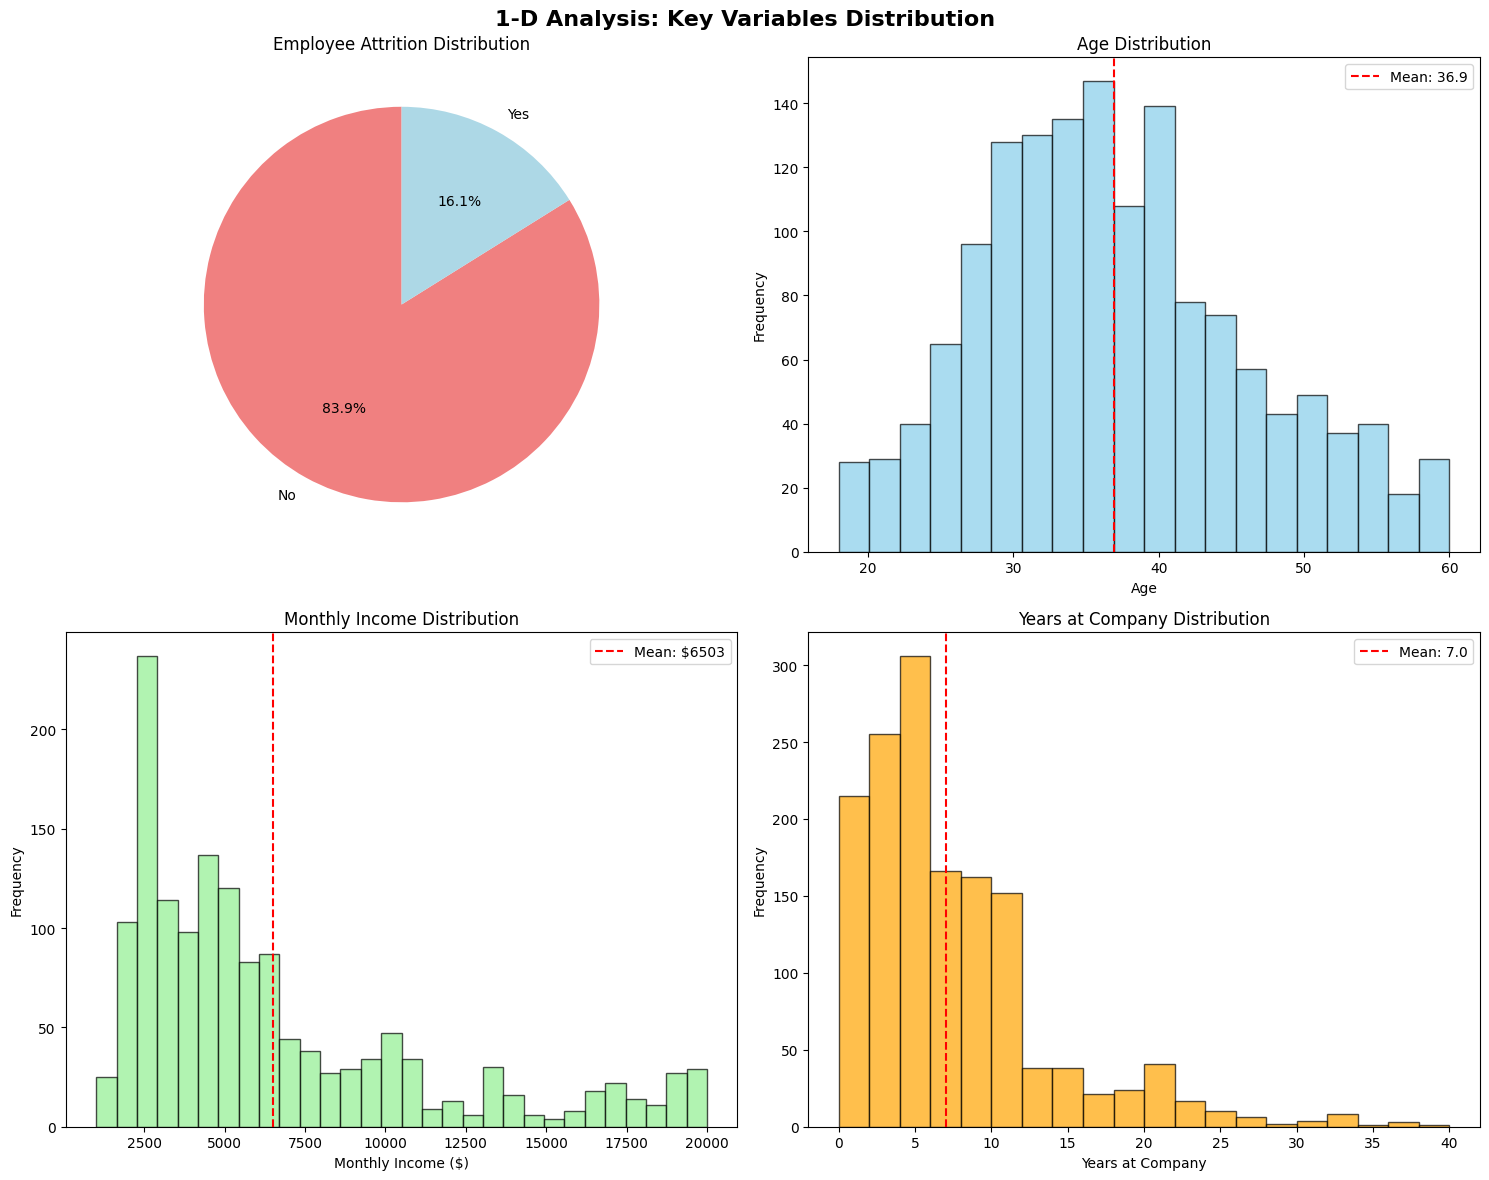

In [37]:
# comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('1-D Analysis: Key Variables Distribution', fontsize=16, fontweight='bold')

# 1. Attrition Distribution
axes[0,0].pie(df_processed['Attrition'].value_counts(),
              labels=df_processed['Attrition'].value_counts().index,
              autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
axes[0,0].set_title('Employee Attrition Distribution')

# 2. Age Distribution
axes[0,1].hist(df_processed['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_title('Age Distribution')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(df_processed['Age'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df_processed["Age"].mean():.1f}')
axes[0,1].legend()

# 3. Monthly Income Distribution
axes[1,0].hist(df_processed['MonthlyIncome'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Monthly Income Distribution')
axes[1,0].set_xlabel('Monthly Income ($)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].axvline(df_processed['MonthlyIncome'].mean(), color='red', linestyle='--',
                  label=f'Mean: ${df_processed["MonthlyIncome"].mean():.0f}')
axes[1,0].legend()

# 4. Years at Company Distribution
axes[1,1].hist(df_processed['YearsAtCompany'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_title('Years at Company Distribution')
axes[1,1].set_xlabel('Years at Company')
axes[1,1].set_ylabel('Frequency')
axes[1,1].axvline(df_processed['YearsAtCompany'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df_processed["YearsAtCompany"].mean():.1f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()


We can see that age graph follows normal distribution while monthly income distribution and years at company graphs are right skewed distributions which means majority of the employs has lower salary than mean and the number of people with having worked at the company for longer then mean are less.

In [38]:
print("\n" + "="*60)
print("2-D EXPLORATORY DATA ANALYSIS - ATTRITION FACTORS")
print("="*60)


2-D EXPLORATORY DATA ANALYSIS - ATTRITION FACTORS


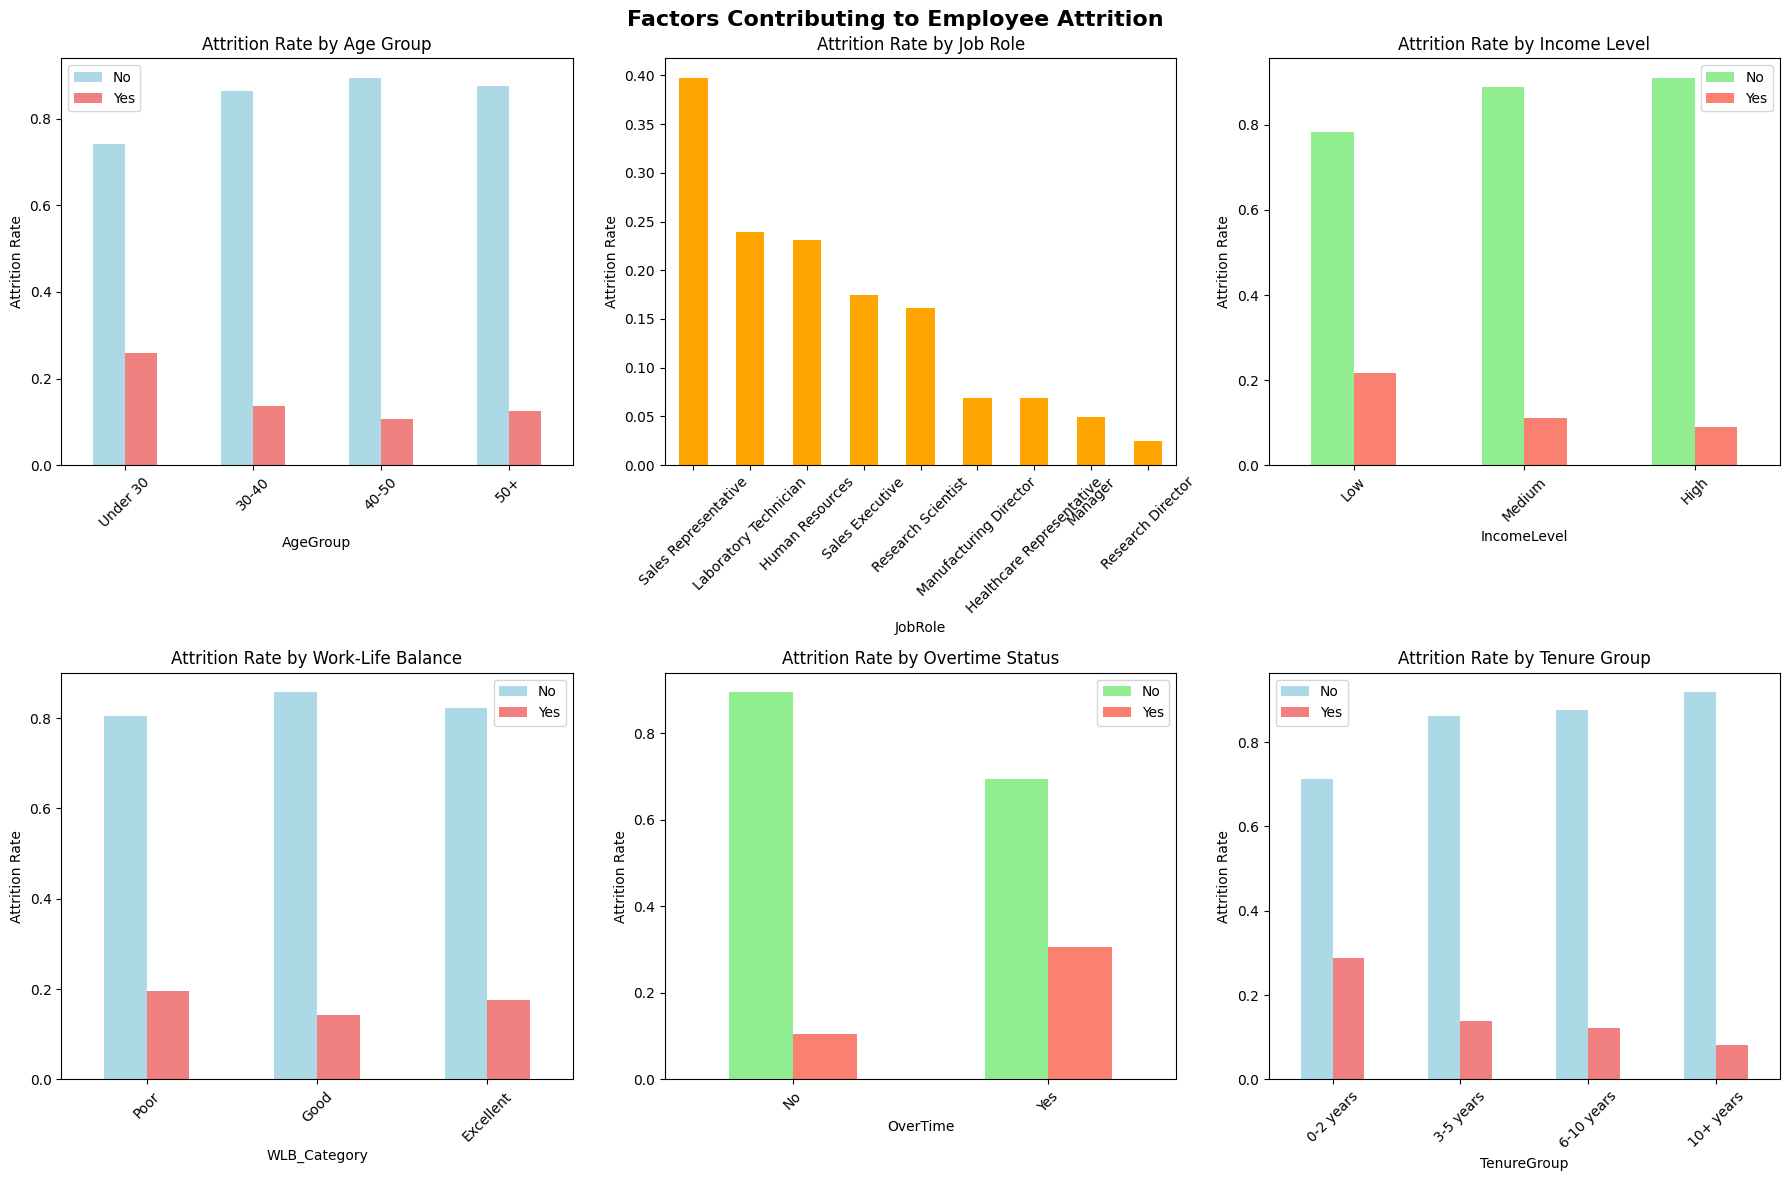

In [40]:
# 1. Attrition by Age Group
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Factors Contributing to Employee Attrition', fontsize=16, fontweight='bold')

# Age Group vs Attrition
age_attrition = pd.crosstab(df_processed['AgeGroup'], df_processed['Attrition'], normalize='index')
age_attrition.plot(kind='bar', ax=axes[0,0], color=['lightblue', 'lightcoral'])
axes[0,0].set_title('Attrition Rate by Age Group')
axes[0,0].set_ylabel('Attrition Rate')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(['No', 'Yes'])

# Job Role vs Attrition
job_attrition = df_processed.groupby('JobRole')['Attrition'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False)
job_attrition.plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title('Attrition Rate by Job Role')
axes[0,1].set_ylabel('Attrition Rate')
axes[0,1].tick_params(axis='x', rotation=45)

# Income Level vs Attrition
income_attrition = pd.crosstab(df_processed['IncomeLevel'], df_processed['Attrition'], normalize='index')
income_attrition.plot(kind='bar', ax=axes[0,2], color=['lightgreen', 'salmon'])
axes[0,2].set_title('Attrition Rate by Income Level')
axes[0,2].set_ylabel('Attrition Rate')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].legend(['No', 'Yes'])

# Work-Life Balance vs Attrition
wlb_attrition = pd.crosstab(df_processed['WLB_Category'], df_processed['Attrition'], normalize='index')
wlb_attrition.plot(kind='bar', ax=axes[1,0], color=['lightblue', 'lightcoral'])
axes[1,0].set_title('Attrition Rate by Work-Life Balance')
axes[1,0].set_ylabel('Attrition Rate')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['No', 'Yes'])

# Overtime vs Attrition
overtime_attrition = pd.crosstab(df_processed['OverTime'], df_processed['Attrition'], normalize='index')
overtime_attrition.plot(kind='bar', ax=axes[1,1], color=['lightgreen', 'salmon'])
axes[1,1].set_title('Attrition Rate by Overtime Status')
axes[1,1].set_ylabel('Attrition Rate')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(['No', 'Yes'])

# Tenure Group vs Attrition
tenure_attrition = pd.crosstab(df_processed['TenureGroup'], df_processed['Attrition'], normalize='index')
tenure_attrition.plot(kind='bar', ax=axes[1,2], color=['lightblue', 'lightcoral'])
axes[1,2].set_title('Attrition Rate by Tenure Group')
axes[1,2].set_ylabel('Attrition Rate')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].legend(['No', 'Yes'])

plt.tight_layout()
plt.show()


From the above graph we can conclude that employees under age 30 are more likely to get attrition compared to others.

Sales Representatives are more likely to get attrition compared to other roles.

Attrition in low income employee is more than compared to others.

Employees having worked at the company more than two years are less likely to get attrition.

Employees doing overtime are more likely to get attrition.

Work-Life Balance does not seem to be a deciding factor for attribution since there is not much considerable difference among poor, good and excellent WLB employees.


CORRELATION ANALYSIS


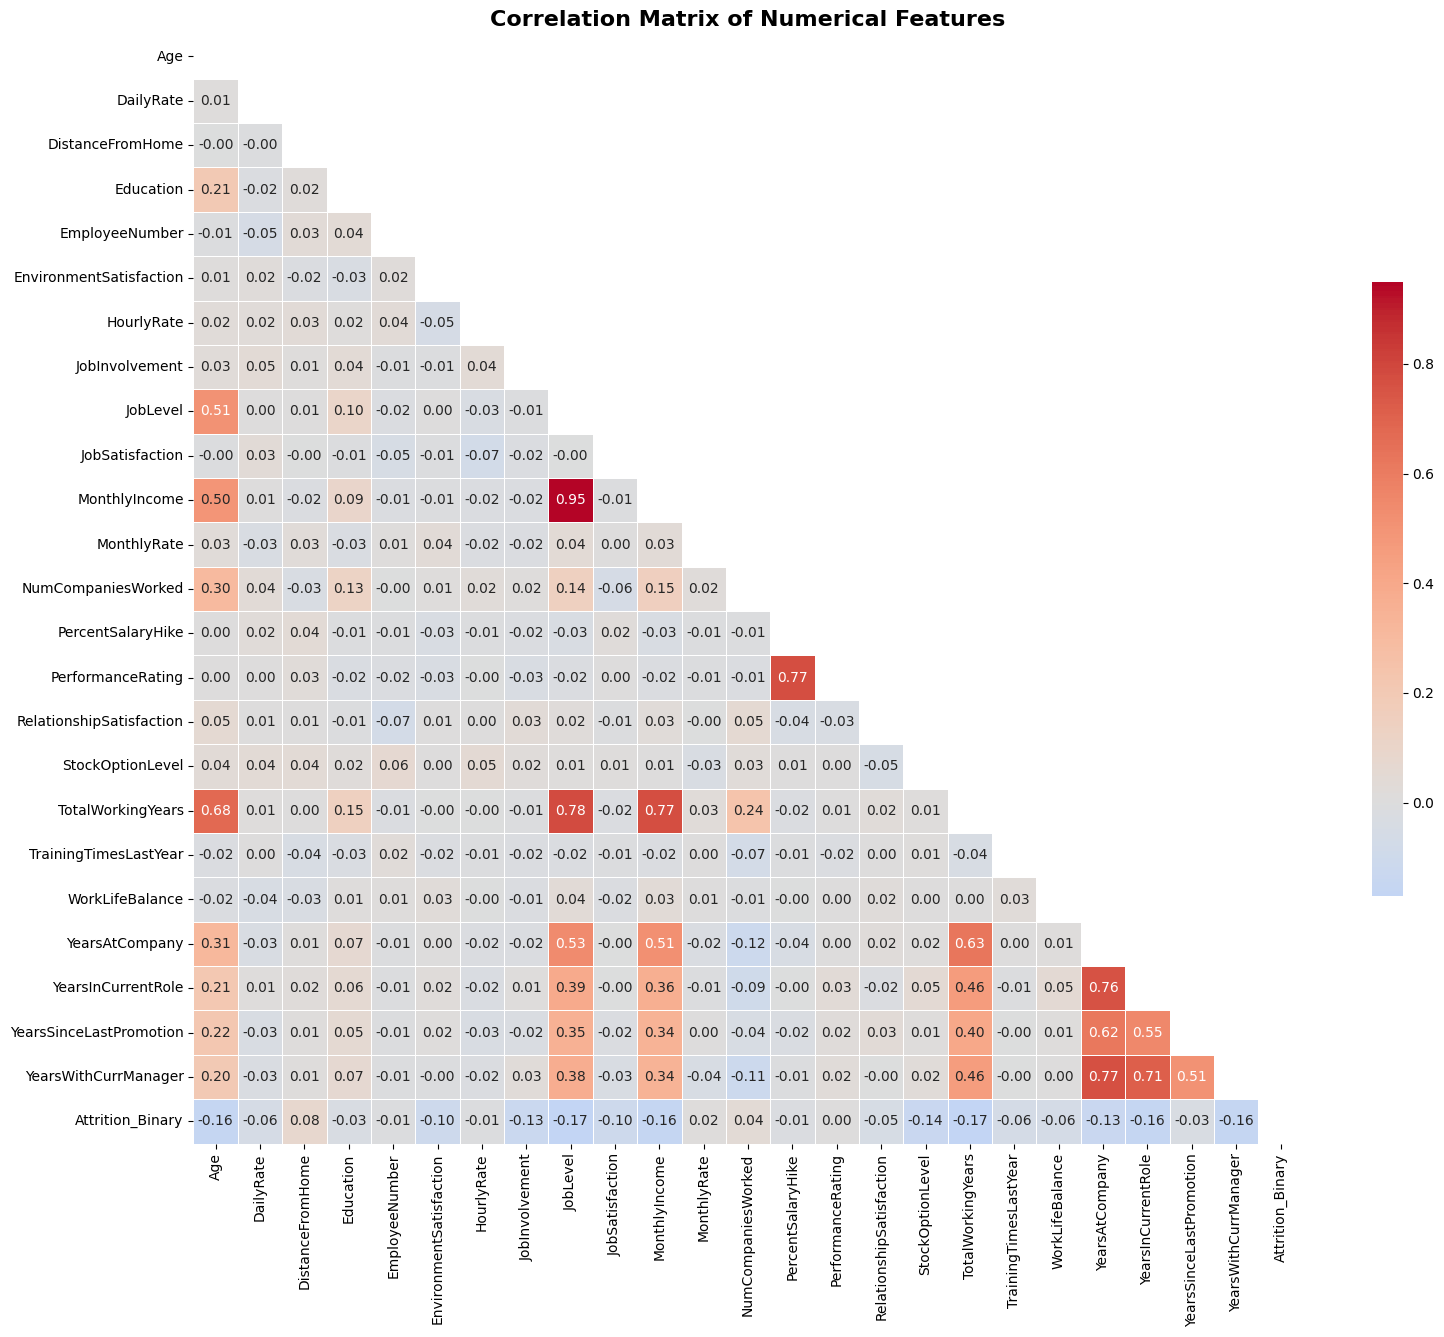

Strongest correlations with Attrition:
Attrition_Binary        1.000000
TotalWorkingYears       0.171063
JobLevel                0.169105
YearsInCurrentRole      0.160545
MonthlyIncome           0.159840
Age                     0.159205
YearsWithCurrManager    0.156199
StockOptionLevel        0.137145
YearsAtCompany          0.134392
JobInvolvement          0.130016
Name: Attrition_Binary, dtype: float64


In [41]:
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculating correlation matrix for numerical features
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
correlation_matrix = df_processed[numerical_cols].corr()

# correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Finding strongest correlations with Attrition
attrition_corr = correlation_matrix['Attrition_Binary'].abs().sort_values(ascending=False)
print("Strongest correlations with Attrition:")
print(attrition_corr.head(10))

This correlation matrix is consolidating that though there is some correlation among few features with attribution but not any individual numerical feature has high strong correlation which we alse observed in previous graphs.


ADVANCED PATTERN ANALYSIS


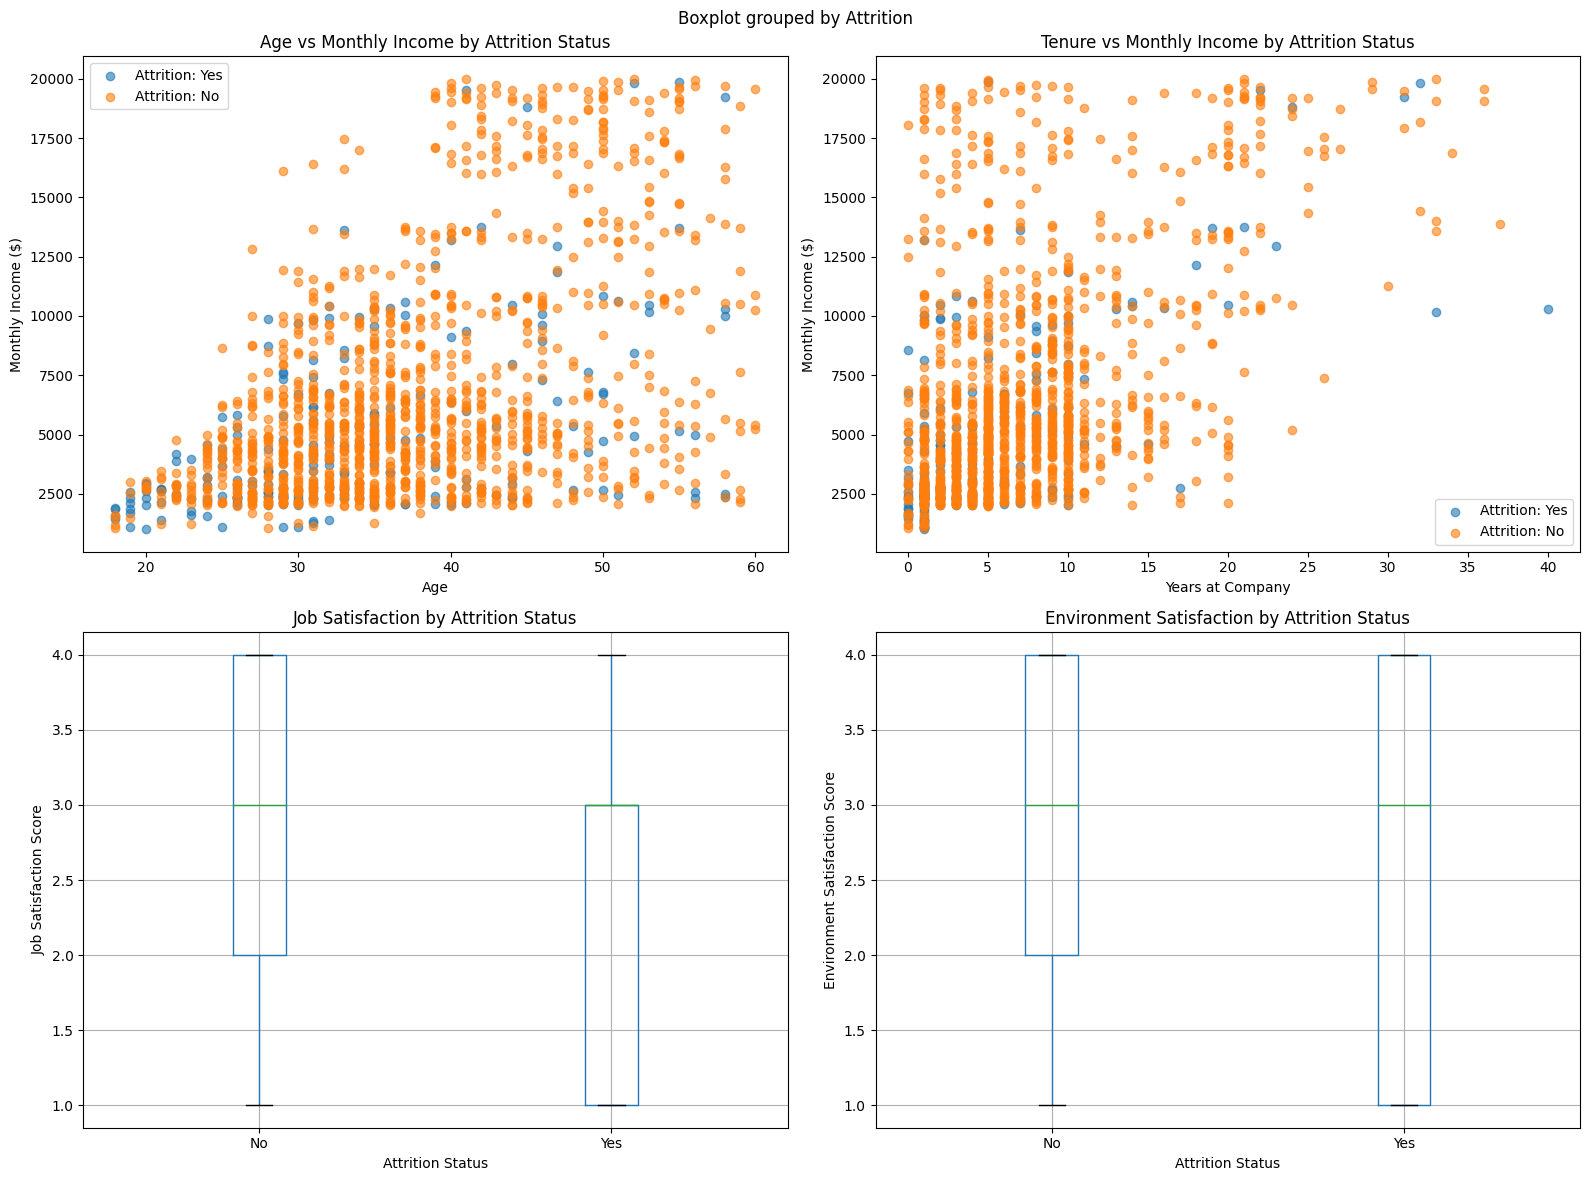

In [42]:
print("\n" + "="*60)
print("ADVANCED PATTERN ANALYSIS")
print("="*60)

# Multi-dimensional analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advanced Pattern Analysis', fontsize=16, fontweight='bold')

# 1. Age vs Monthly Income colored by Attrition
for attrition_status in df_processed['Attrition'].unique():
    subset = df_processed[df_processed['Attrition'] == attrition_status]
    axes[0,0].scatter(subset['Age'], subset['MonthlyIncome'],
                     label=f'Attrition: {attrition_status}', alpha=0.6)
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Monthly Income ($)')
axes[0,0].set_title('Age vs Monthly Income by Attrition Status')
axes[0,0].legend()

# 2. Years at Company vs Monthly Income
for attrition_status in df_processed['Attrition'].unique():
    subset = df_processed[df_processed['Attrition'] == attrition_status]
    axes[0,1].scatter(subset['YearsAtCompany'], subset['MonthlyIncome'],
                     label=f'Attrition: {attrition_status}', alpha=0.6)
axes[0,1].set_xlabel('Years at Company')
axes[0,1].set_ylabel('Monthly Income ($)')
axes[0,1].set_title('Tenure vs Monthly Income by Attrition Status')
axes[0,1].legend()

# 3. Job Satisfaction Distribution by Attrition
df_processed.boxplot(column='JobSatisfaction', by='Attrition', ax=axes[1,0])
axes[1,0].set_title('Job Satisfaction by Attrition Status')
axes[1,0].set_xlabel('Attrition Status')
axes[1,0].set_ylabel('Job Satisfaction Score')

# 4. Environment Satisfaction Distribution by Attrition
df_processed.boxplot(column='EnvironmentSatisfaction', by='Attrition', ax=axes[1,1])
axes[1,1].set_title('Environment Satisfaction by Attrition Status')
axes[1,1].set_xlabel('Attrition Status')
axes[1,1].set_ylabel('Environment Satisfaction Score')

plt.tight_layout()
plt.show()

While from the first two graphs we can see that there is no specific pattern that we can deduce to predict attrition but from the last two graphs we can see that employees having less satisfaction with job and environment are more likely to attrition.

In [47]:
print("\n" + "="*60)
print("KEY INSIGHTS AND SUMMARY")
print("="*60)

# Calculate key metrics for different groups
print("KEY FINDINGS:")
print("-" * 40)

# Overall attrition rate
overall_attrition = (df_processed['Attrition'] == 'Yes').mean()
print(f"1. Overall Attrition Rate: {overall_attrition:.1%}")

# Attrition by key factors
print(f"\n2. Attrition by Income Level:")
for level in ['Low', 'Medium', 'High']:
    rate = (df_processed[df_processed['IncomeLevel'] == level]['Attrition'] == 'Yes').mean()
    print(f"   {level} Income: {rate:.1%}")

print(f"\n3. Attrition by Age Group:")
for group in ['Under 30', '30-40', '40-50', '50+']:
    rate = (df_processed[df_processed['AgeGroup'] == group]['Attrition'] == 'Yes').mean()
    print(f"   {group}: {rate:.1%}")

print(f"\n4. Attrition by Overtime:")
for overtime in ['No', 'Yes']:
    rate = (df_processed[df_processed['OverTime'] == overtime]['Attrition'] == 'Yes').mean()
    print(f"   Overtime {overtime}: {rate:.1%}")

print(f"\n5. Average characteristics of employees who left:")
left_employees = df_processed[df_processed['Attrition'] == 'Yes']
print(f"   Average Age: {left_employees['Age'].mean():.1f} years")
print(f"   Average Monthly Income: ${left_employees['MonthlyIncome'].mean():.0f}")
print(f"   Average Years at Company: {left_employees['YearsAtCompany'].mean():.1f} years")
print(f"   Average Job Satisfaction: {left_employees['JobSatisfaction'].mean():.1f}/4")

print(f"\n6. Top 3 Job Roles with Highest Attrition:")
job_attrition_top3 = job_attrition.head(3)
for job, rate in job_attrition_top3.items():
    print(f"   {job}: {rate:.1%}")
print("\nFew of the key factors affecting attrition are employees with 'sales representative' role, low job satisfaction score, \n low environment satisfaction score, and some not so strong contributors are age and income")
print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)


KEY INSIGHTS AND SUMMARY
KEY FINDINGS:
----------------------------------------
1. Overall Attrition Rate: 16.1%

2. Attrition by Income Level:
   Low Income: 21.8%
   Medium Income: 11.1%
   High Income: 8.9%

3. Attrition by Age Group:
   Under 30: 25.9%
   30-40: 13.7%
   40-50: 10.6%
   50+: 12.6%

4. Attrition by Overtime:
   Overtime No: 10.4%
   Overtime Yes: 30.5%

5. Average characteristics of employees who left:
   Average Age: 33.6 years
   Average Monthly Income: $4787
   Average Years at Company: 5.1 years
   Average Job Satisfaction: 2.5/4

6. Top 3 Job Roles with Highest Attrition:
   Sales Representative: 39.8%
   Laboratory Technician: 23.9%
   Human Resources: 23.1%

Few of the key factors affecting attrition are employees with 'sales representative' role, low job satisfaction score, 
 low environment satisfaction score, and some not so strong contributors are age and income

ANALYSIS COMPLETE
